In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Coffe_sales.csv")

In [3]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [4]:
monthly_sales = df.groupby(['Month_name', 'Monthsort']).agg({
    'money': ['sum', 'count'],
}).reset_index()
monthly_sales.columns = ['Month', 'MonthSort', 'TotalRevenue', 'TransactionCount']
monthly_sales = monthly_sales.sort_values('MonthSort')
monthly_sales

,Month,MonthSort,TotalRevenue,TransactionCount
4,Jan,1,6398.86,201
3,Feb,2,13215.48,423
7,Mar,3,15891.64,494
0,Apr,4,5719.56,168
8,May,5,8164.42,241
6,Jun,6,7617.76,223
5,Jul,7,6915.94,237
1,Aug,8,7613.84,272
11,Sep,9,9988.64,344
10,Oct,10,13891.16,426


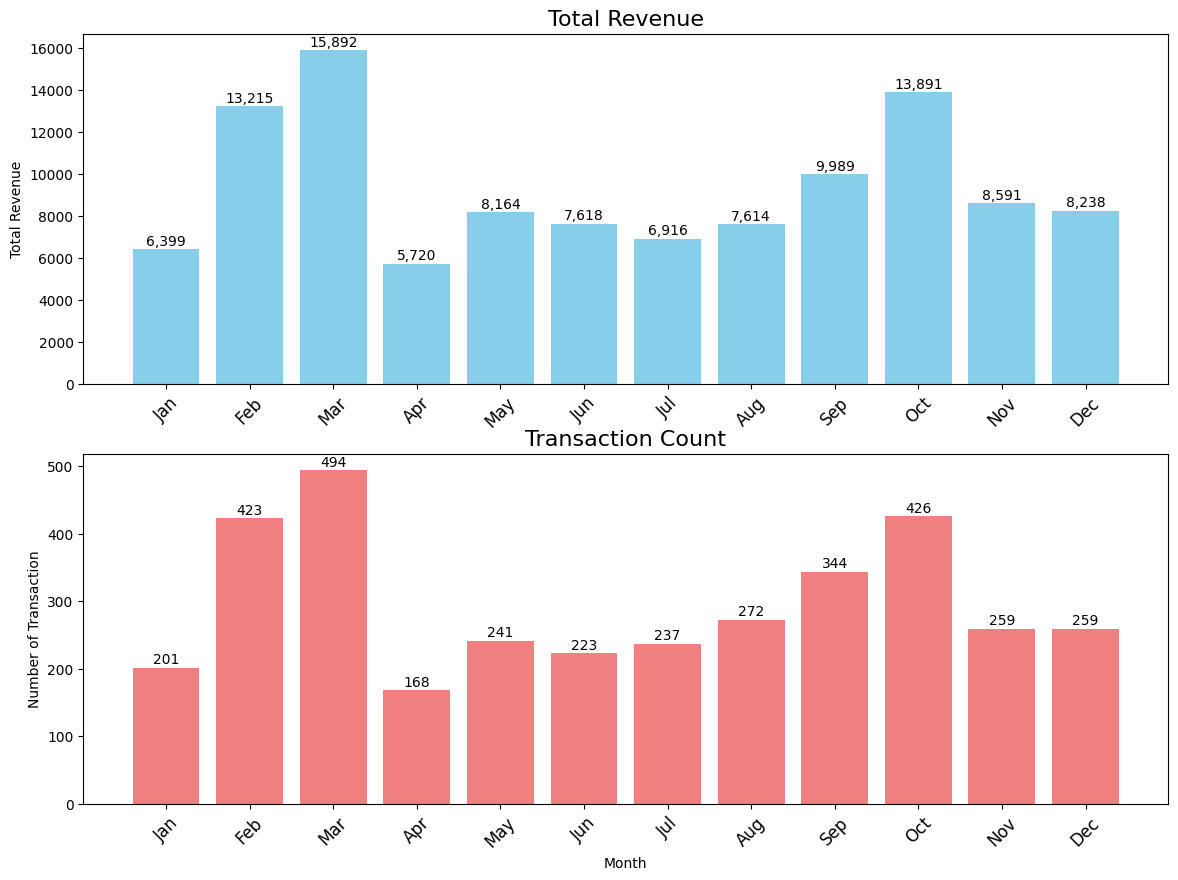

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

ax1.bar(monthly_sales['Month'], monthly_sales['TotalRevenue'], color='skyblue')
ax1.set_title('Total Revenue', fontsize=16)
ax1.set_ylabel('Total Revenue')
ax1.tick_params(axis='x', rotation=45, labelsize=12)
for i, v in enumerate(monthly_sales['TotalRevenue']):
    ax1.text(i, v + 50, f'{v:,.0f}', ha='center', va='bottom')

# 月度交易量
ax2.bar(monthly_sales['Month'], monthly_sales['TransactionCount'], color='lightcoral')
ax2.set_title('Transaction Count', fontsize=16)
ax2.set_ylabel('Number of Transaction')
ax2.set_xlabel('Month')
ax2.tick_params(axis='x', rotation=45, labelsize=12)
for i, v in enumerate(monthly_sales['TransactionCount']):
    ax2.text(i, v + 2, f'{v:.0f}', ha='center', va='bottom')

In [6]:
product_analysis = df.groupby('coffee_name').agg({
    'money': ['sum', 'count', 'mean'],
}).round(2)
product_analysis.columns = ['TotalRevenue', 'TransactionCount', 'AveragePrice']
product_analysis = product_analysis.sort_values('TotalRevenue', ascending=False)
product_analysis

,TotalRevenue,TransactionCount,AveragePrice
coffee_name,,,
Latte,26875.30,757,35.50
Americano with Milk,24751.12,809,30.59
Cappuccino,17439.14,486,35.88
Americano,14650.26,564,25.98
Hot Chocolate,9933.46,276,35.99
Cocoa,8521.16,239,35.65
Cortado,7384.86,287,25.73
Espresso,2690.28,129,20.85


Text(0.5, 1.0, 'Pie plot of each different product')

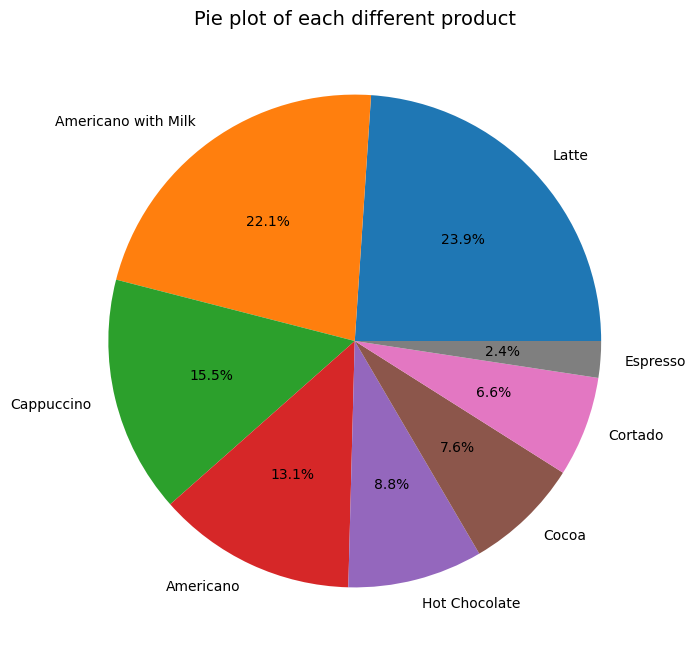

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))
ax1.pie(product_analysis['TotalRevenue'], labels=product_analysis.index,autopct='%1.1f%%')
ax1.set_title('Pie plot of each different product', fontsize=14)

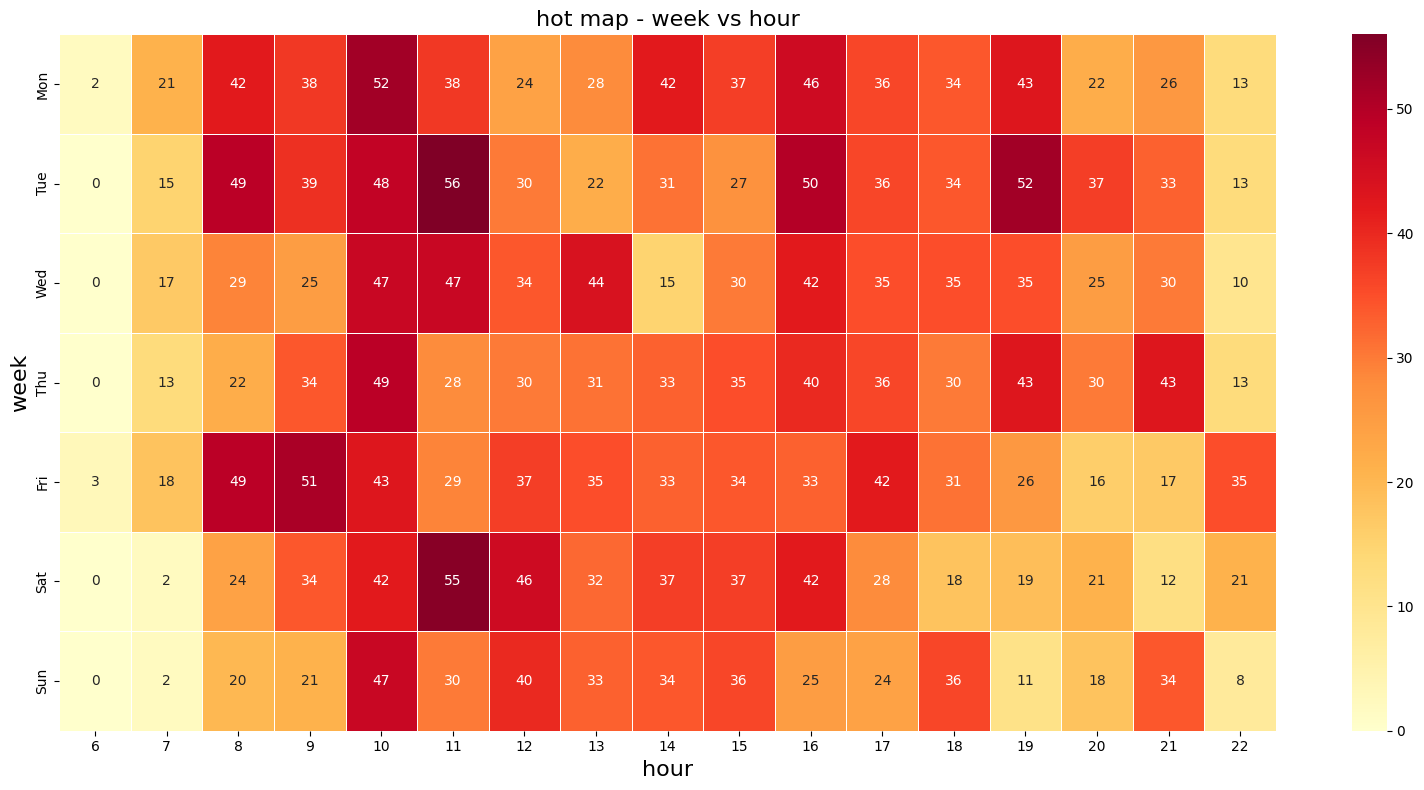

In [8]:
heatmap_data = df.pivot_table(values='money', 
                            index='Weekday', 
                            columns='hour_of_day', 
                            aggfunc='count', 
                            fill_value=0)

weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_data = heatmap_data.reindex(weekday_order)

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f', linewidths=0.5)
plt.title('hot map - week vs hour', fontsize=16)
plt.xlabel('hour', fontsize=16)
plt.ylabel('week', fontsize=16)
plt.tight_layout()

In [9]:
milk_keywords = ['Latte', 'Milk', 'Cappuccino', 'Hot Chocolate', 'Mocha', 'Cocoa']
def categorize_milk(coffee_name):
    for keyword in milk_keywords:
        if keyword in coffee_name:
            return 'Milk'
    return 'No Milk'

df['Milk_Category'] = df['coffee_name'].apply(categorize_milk)

print(df[['coffee_name', 'Milk_Category', 'money']].head())
print(df['Milk_Category'].value_counts())

     coffee_name Milk_Category  money
0          Latte          Milk   38.7
1  Hot Chocolate          Milk   38.7
2  Hot Chocolate          Milk   38.7
3      Americano       No Milk   28.9
4          Latte          Milk   38.7
Milk_Category
Milk       2567
No Milk     980
Name: count, dtype: int64


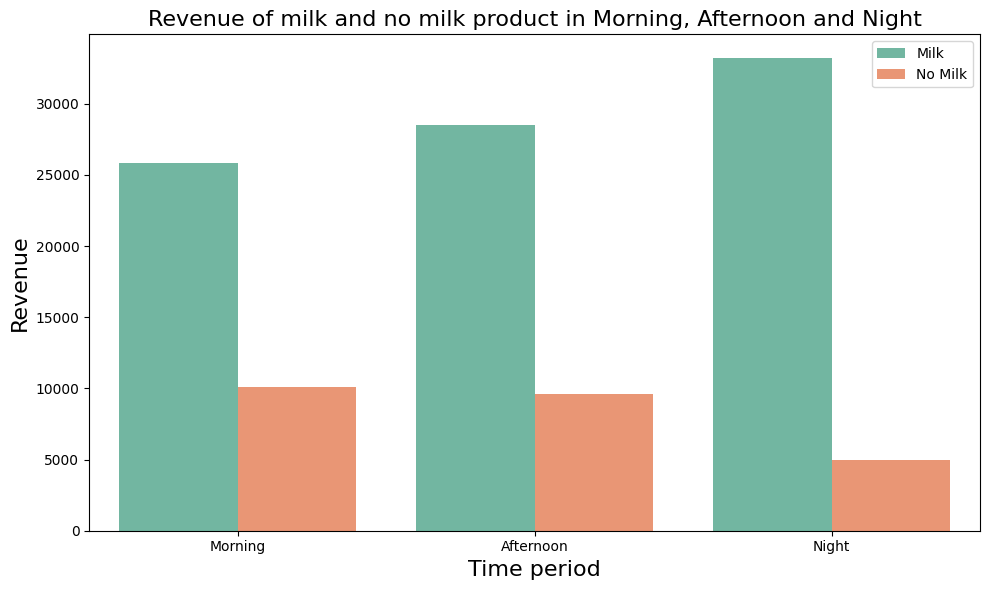

In [15]:
time_milk_sales = df.groupby(['Time_of_Day', 'Milk_Category'])['money'].sum().reset_index()

time_order = ['Morning', 'Afternoon', 'Night']
time_milk_sales['Time_of_Day'] = pd.Categorical(time_milk_sales['Time_of_Day'], categories=time_order, ordered=True)
time_milk_sales = time_milk_sales.sort_values('Time_of_Day')

plt.figure(figsize=(10, 6))
sns.barplot(x='Time_of_Day', y='money', hue='Milk_Category', data=time_milk_sales, palette="Set2")
plt.title('Revenue of milk and no milk product in Morning, Afternoon and Night', fontsize=16)
plt.xlabel('Time period', fontsize=16)
plt.ylabel('Revenue', fontsize=16)
plt.legend()
plt.tight_layout()
